In [10]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
def getF1Score (data):
    s = "Safe"
    v = "Vulnerable"

    tp = 0
    tn = 0
    fn = 0
    fp = 0

    for el in data:
        if el["received"] != s and el["received"] != v:
            el["received"] = s if s in el["received"] else v

        if el["received"] == s and el["expected"] == s:
            tp += 1
        elif el["received"] == v and el["expected"] == v:
            tn += 1
        elif el["received"] == s and el["expected"] == v:
            fp += 1
        elif el["received"] == v and el["expected"] == s:
            fn += 1
        else:
            print(f"incorrect: {el['received']}")
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return (2 * (precision * recall)) / (precision + recall)

def getF1Scores (folder_name):
    folder = Path(f"../results/{folder_name}")
    files = [f for f in folder.iterdir() if f.is_file()]
    
    names = []
    values = []

    for file in files:
        with open(file, "r", encoding="utf-8") as f:
            data = json.load(f)
            names.append(file.name)
            values.append(getF1Score(data))

    return (names, values)


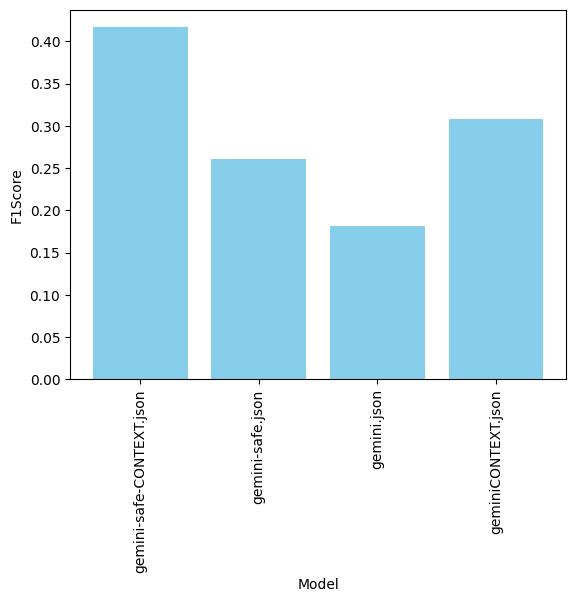

In [ ]:
data = getF1Scores("gemini")

names, values = data

plt.bar(names, values, color="skyblue")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("F1Score")
plt.show()

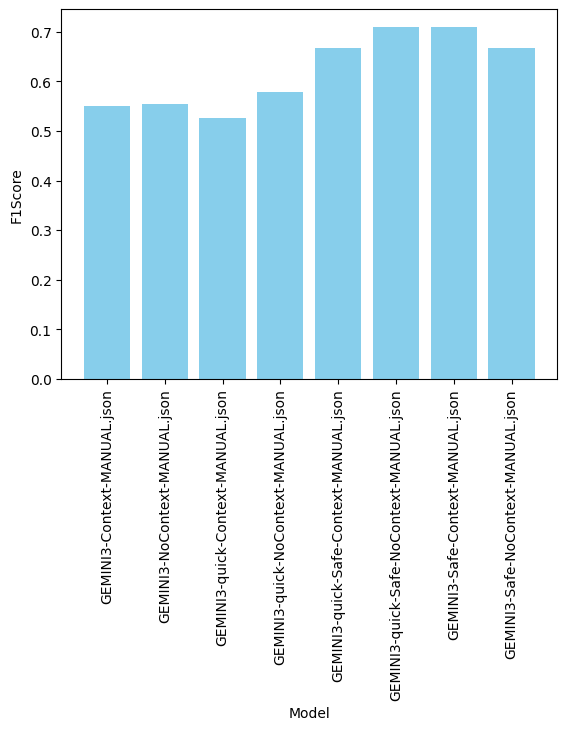

In [ ]:
data = getF1Scores("gemini-manual")

names, values = data

plt.bar(names, values, color="skyblue")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("F1Score")
plt.show()

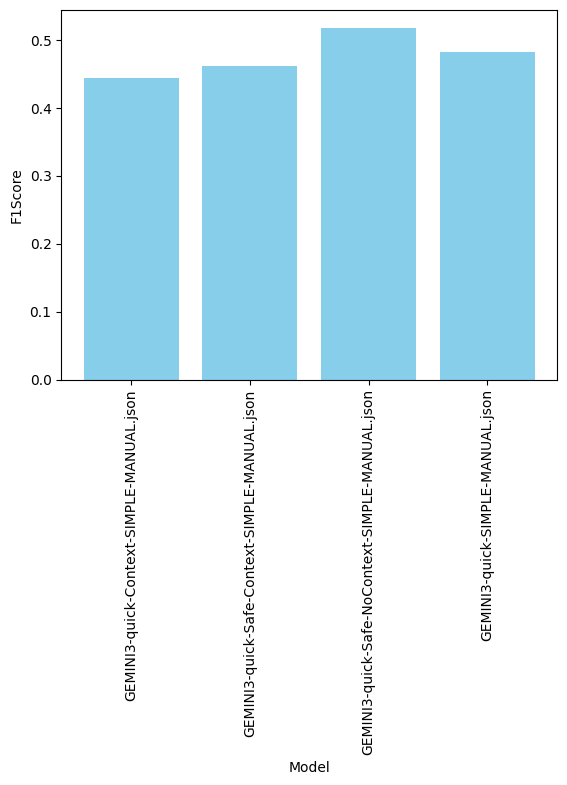

In [ ]:
data = getF1Scores("gemini-manual-simple")

names, values = data

plt.bar(names, values, color="skyblue")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("F1Score")
plt.show()